## A5 w/Impute 0

### Anthony Buttitta

In [1]:
#Ignore time (Stamp)

## Import needed modules

In [2]:
#general libraries always needed
import pandas as pd
import numpy as np
import math

#plotting required modules
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FixedLocator, FixedFormatter

#sklearn clustering / unsupervised learning modules
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

#sklearn modules for preprocessing and transformation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Function Definitions

In [3]:
#function to create an Avg. Distance to Nearest Neighbor plt
def nn_avg_distance(X):
    plt.figure(figsize=(10,5))
    nn = NearestNeighbors(n_neighbors=15).fit(X)
    distances, idx = nn.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.xlabel("Instances", fontsize=14)
    plt.ylabel("Distances", fontsize=14)
    plt.title("Average Distance to Nearset Neighbor")
    plt.show()

In [4]:
#function to create a silhouette diagram
#requires the model, the independent value (i.e. X) used to fit the model, and a list of k values to plot

def inertia_silhouette_plot( X, k_values): 

    #iterate through different k values and collect inertia values and silhouette scores
    kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, max(k_values)+1)]
    inertias = [model.inertia_ for model in kmeans_per_k]
    silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]    
    
    #print the silhouette scores and k values
    plt.plot(inertias)
    plt.ylabel("Inertia", fontsize=14)
    plt.xlabel("k Value", fontsize=14)
    plt.show()
    print("-"*80)
    #create the plot's figure
    plt.figure(figsize=(10, len(k_values)*3))

    ct = 0 #temp counter variable

    #build a subplot for each value of k
    for k in k_values:
    
        #create the subplot
        ct +=1
        plt.subplot(math.ceil(len(k_values)/2), 2, ct)
    
        #get the predictions and silhouette value
        y_pred = kmeans_per_k[k - 1].labels_
        silhouette_coefficients = silhouette_samples(X, y_pred)

        #create the bars for each cluster
        padding = len(X) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = mpl.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

       #plot the silhouette line
        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        
        #chart title
        plt.title("k={} --- {:.2}".format(k, silhouette_scores[k - 2]), fontsize=16)
 
        #add a y label for each row and an x axis label for the last 2 graphs
        if ct%2 == 1:
            plt.ylabel("Cluster")
        if ct == len(k_values) or ct==len(k_values)-1:
            #plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
                
    #plot
    plt.show()

In [5]:
#function to create a 2 dimmensional representation of data using tSNE
#needs the independent data as well as Y label data OR prediction
def tsne_plot(X, y):
    X_tsne = TSNE(learning_rate=1000, perplexity=25, init="random").fit_transform(X)
    plt.figure(1, facecolor='white', figsize=(10, 12))
    a=plt.scatter(
        X_tsne[(y!=-1), 0],
        X_tsne[(y!=-1), 1],
        s=100,
        alpha=0.90,
        c=y[y!=-1],
        cmap=cm.Paired
    )
    plt.legend(handles=a.legend_elements()[0],labels=a.legend_elements()[1])
    plt.scatter(
        X_tsne[(y==-1), 0],
        X_tsne[(y==-1), 1],
        s=100,
        alpha=0.05
    )
    plt.title('T-SNE Plot')
    plt.show()

In [6]:
#function to verify the existence of a file in the current working directory and download it if not
import os,urllib, urllib.request, sys, tarfile
def downloadDataResource(file,sourcePath,compressed=None):
    if not os.path.isfile(file):
        try:
            urllib.request.urlretrieve(sourcePath+(compressed if compressed else file),(compressed if compressed else file))
            print("Downloaded", (compressed if compressed else file) )
            if compressed:
                ucomp = tarfile.open(compressed)
                ucomp.extractall()
                ucomp.close()
                print("File uncompressed.")
        except:
            print("ERROR: File", (compressed if compressed else file), "not found. Data source missing.")
    else:
        print("Data resource", file, "already downloaded.")## <font color=blue>Source data</font>

## Source Data

In [7]:
#download data files if not currently downloaded into the current working directory
path = "https://raw.githubusercontent.com/SueMcMetzger/MachineLearning/main/chpt8/"

filename = ["movieGenres.csv","movieRatings.csv","movieUserDetails.csv"]

for f in filename:
    downloadDataResource(f,path)
    
#read files into dataframes
movieGenres = pd.read_csv(filename[0])
movieRatings = pd.read_csv(filename[1])
movieUserDetails = pd.read_csv(filename[2])

Data resource movieGenres.csv already downloaded.
Data resource movieRatings.csv already downloaded.
Data resource movieUserDetails.csv already downloaded.


In [8]:
movieUserDetails.occupation.value_counts()

4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: occupation, dtype: int64

In [9]:
movieRatings.columns

Index(['userID', 'movieID', 'rating'], dtype='object')

In [10]:
movieGenres.columns

Index(['Unnamed: 0', 'movieID', 'movieTitle', 'genres', 'Adventure',
       'Animation', 'Film-Noir', 'Horror', 'Thriller', 'Children's',
       'Documentary', 'Drama', 'Sci-Fi', 'Western', 'Musical', 'Fantasy',
       'Action', 'Romance', 'Crime', 'Mystery', 'War', 'Comedy'],
      dtype='object')

In [11]:
movieGenres.shape

(3883, 22)

In [12]:
movieRatings.shape

(1000209, 3)

In [13]:
movieUserDetails.shape

(6040, 4)

In [14]:
movieRatings.describe()

,userID,movieID,rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [15]:
movieUserDetails.describe()

,userID,age,occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


## Prepare the Data

In [16]:
result = pd.concat([movieGenres, movieRatings], axis=1, join="inner")

In [17]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3883 non-null   int64 
 1   movieID      3883 non-null   int64 
 2   movieTitle   3883 non-null   object
 3   genres       3883 non-null   object
 4   Adventure    3883 non-null   int64 
 5   Animation    3883 non-null   int64 
 6   Film-Noir    3883 non-null   int64 
 7   Horror       3883 non-null   int64 
 8   Thriller     3883 non-null   int64 
 9   Children's   3883 non-null   int64 
 10  Documentary  3883 non-null   int64 
 11  Drama        3883 non-null   int64 
 12  Sci-Fi       3883 non-null   int64 
 13  Western      3883 non-null   int64 
 14  Musical      3883 non-null   int64 
 15  Fantasy      3883 non-null   int64 
 16  Action       3883 non-null   int64 
 17  Romance      3883 non-null   int64 
 18  Crime        3883 non-null   int64 
 19  Mystery      3883 non-null 

In [18]:
result = result.groupby(["userID",'genres']).rating.mean()

In [19]:
result.tail(50)

userID  genres                        
26      Horror|Sci-Fi|Thriller            3.250000
        Horror|Thriller                   4.500000
        Musical                           3.333333
        Musical|War                       3.000000
        Mystery|Thriller                  2.000000
        Romance|Thriller                  3.000000
        Sci-Fi                            3.800000
        Sci-Fi|Thriller                   3.666667
        Thriller                          3.500000
        War                               3.000000
        Western                           3.375000
27      Action                            4.000000
        Action|Adventure|Fantasy          3.500000
        Action|Adventure|Sci-Fi           5.000000
        Action|Comedy                     5.000000
        Comedy                            4.307692
        Comedy|Documentary                5.000000
        Comedy|Drama                      4.750000
        Comedy|Romance                    5

In [20]:
#merge together the 2 data sets
data = pd.merge(movieGenres,
                 movieRatings, left_on="movieID", right_on="movieID", how="left")

In [21]:
#merge together the 2 data sets
data = pd.merge(data,
                 movieUserDetails, left_on="userID", right_on="userID", how="left")

In [22]:
data9 = data[data["Adventure"]==1].groupby(by="userID").rating.mean().to_frame("Adventure")
data10 = data[data["Animation"]==1].groupby(by="userID").rating.mean().to_frame("Animation")
data11 = data[data["Film-Noir"]==1].groupby(by="userID").rating.mean().to_frame("Film-Noir")
data12 = data[data["Horror"]==1].groupby(by="userID").rating.mean().to_frame("Horror")
data13 = data[data["Thriller"]==1].groupby(by="userID").rating.mean().to_frame("Thiller")
data14 = data[data["Children's"]==1].groupby(by="userID").rating.mean().to_frame("Children's")
data15 = data[data["Documentary"]==1].groupby(by="userID").rating.mean().to_frame("Documentary")
data16 = data[data["Drama"]==1].groupby(by="userID").rating.mean().to_frame("Drama")
data17 = data[data["Sci-Fi"]==1].groupby(by="userID").rating.mean().to_frame("Sci-Fi")
data18 = data[data["Western"]==1].groupby(by="userID").rating.mean().to_frame("Western")
data19 = data[data["Musical"]==1].groupby(by="userID").rating.mean().to_frame("Musical")
data20 = data[data["Fantasy"]==1].groupby(by="userID").rating.mean().to_frame("Fantasy")
data21 = data[data["Action"]==1].groupby(by="userID").rating.mean().to_frame("Action")
data22 = data[data["Romance"]==1].groupby(by="userID").rating.mean().to_frame("Romance")
data23 = data[data["Crime"]==1].groupby(by="userID").rating.mean().to_frame("Crime")
data24 = data[data["Mystery"]==1].groupby(by="userID").rating.mean().to_frame("Mystery") 
data25 = data[data["War"]==1].groupby(by="userID").rating.mean().to_frame("War")
data26 = data[data["Comedy"]==1].groupby(by="userID").rating.mean().to_frame("Comedy")

In [23]:
#merge together the 2 data sets
data30 = pd.merge(data9,
                 data10, left_on="userID", right_on="userID", how="left")
data30 = pd.merge(data30,
                 data11, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data12, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data13, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data14, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data15, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data16, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data17, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data18, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data19, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data20, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data21, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data22, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data23, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data24, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data25, left_on="userID", right_on="userID", how="left")
#merge together the 2 data sets
data30 = pd.merge(data30,
                 data26, left_on="userID", right_on="userID", how="left")

In [24]:
data30

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,Musical,Fantasy,Action,Romance,Crime,Mystery,War,Comedy
userID,,,,,,,,,,,,,,,,,,
1.0,4.000000,4.111111,NaN,NaN,3.666667,4.250000,NaN,4.428571,4.333333,NaN,4.285714,4.00,4.200000,3.666667,4.000000,NaN,5.000000,4.142857
2.0,3.736842,NaN,4.000000,3.000000,3.483871,NaN,NaN,3.898734,3.588235,4.333333,NaN,3.00,3.500000,3.708333,3.583333,3.333333,3.733333,3.560000
3.0,4.000000,4.000000,NaN,2.666667,3.800000,4.000000,NaN,4.000000,3.833333,4.666667,4.000000,4.50,3.956522,3.800000,NaN,3.000000,4.000000,3.766667
4.0,3.833333,NaN,NaN,4.333333,3.500000,4.000000,NaN,4.166667,3.555556,4.500000,NaN,4.50,4.157895,4.000000,5.000000,NaN,3.333333,NaN
5.0,3.000000,4.000000,4.000000,2.800000,2.846154,3.833333,3.666667,3.096154,3.066667,4.000000,3.333333,NaN,2.612903,3.100000,3.285714,3.125000,3.500000,3.410714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036.0,2.987952,3.911765,4.058824,2.986486,3.142857,3.444444,3.909091,3.505376,2.834320,3.642857,3.709677,3.00,3.000000,3.352459,3.528302,3.411765,3.785714,3.203065
6037.0,4.000000,4.000000,3.444444,4.111111,3.705882,3.666667,4.000000,3.877551,3.692308,3.750000,4.000000,4.25,3.642857,3.681818,3.833333,3.692308,4.000000,3.576271
6038.0,4.000000,3.666667,NaN,2.500000,NaN,3.000000,NaN,3.888889,4.000000,NaN,NaN,NaN,3.000000,4.166667,NaN,NaN,4.000000,3.833333


In [25]:
#data30.dropna(inplace=True)

In [26]:
data30

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,Musical,Fantasy,Action,Romance,Crime,Mystery,War,Comedy
userID,,,,,,,,,,,,,,,,,,
1.0,4.000000,4.111111,NaN,NaN,3.666667,4.250000,NaN,4.428571,4.333333,NaN,4.285714,4.00,4.200000,3.666667,4.000000,NaN,5.000000,4.142857
2.0,3.736842,NaN,4.000000,3.000000,3.483871,NaN,NaN,3.898734,3.588235,4.333333,NaN,3.00,3.500000,3.708333,3.583333,3.333333,3.733333,3.560000
3.0,4.000000,4.000000,NaN,2.666667,3.800000,4.000000,NaN,4.000000,3.833333,4.666667,4.000000,4.50,3.956522,3.800000,NaN,3.000000,4.000000,3.766667
4.0,3.833333,NaN,NaN,4.333333,3.500000,4.000000,NaN,4.166667,3.555556,4.500000,NaN,4.50,4.157895,4.000000,5.000000,NaN,3.333333,NaN
5.0,3.000000,4.000000,4.000000,2.800000,2.846154,3.833333,3.666667,3.096154,3.066667,4.000000,3.333333,NaN,2.612903,3.100000,3.285714,3.125000,3.500000,3.410714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036.0,2.987952,3.911765,4.058824,2.986486,3.142857,3.444444,3.909091,3.505376,2.834320,3.642857,3.709677,3.00,3.000000,3.352459,3.528302,3.411765,3.785714,3.203065
6037.0,4.000000,4.000000,3.444444,4.111111,3.705882,3.666667,4.000000,3.877551,3.692308,3.750000,4.000000,4.25,3.642857,3.681818,3.833333,3.692308,4.000000,3.576271
6038.0,4.000000,3.666667,NaN,2.500000,NaN,3.000000,NaN,3.888889,4.000000,NaN,NaN,NaN,3.000000,4.166667,NaN,NaN,4.000000,3.833333


In [27]:
data30.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5894 entries, 1.0 to 6040.0
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Adventure    5894 non-null   float64
 1   Animation    4744 non-null   float64
 2   Film-Noir    4088 non-null   float64
 3   Horror       5230 non-null   float64
 4   Thiller      5848 non-null   float64
 5   Children's   5202 non-null   float64
 6   Documentary  2206 non-null   float64
 7   Drama        5891 non-null   float64
 8   Sci-Fi       5802 non-null   float64
 9   Western      4063 non-null   float64
 10  Musical      4687 non-null   float64
 11  Fantasy      4814 non-null   float64
 12  Action       5877 non-null   float64
 13  Romance      5824 non-null   float64
 14  Crime        5532 non-null   float64
 15  Mystery      5029 non-null   float64
 16  War          5655 non-null   float64
 17  Comedy       5885 non-null   float64
dtypes: float64(18)
memory usage: 874.9 KB


In [28]:
data30.shape

(5894, 18)

In [29]:
userRatings = data.groupby(['userID','genres']).rating.mean()

In [30]:
userRatings.head()

userID  genres                         
1.0     Action|Adventure|Comedy|Romance    3.0
        Action|Adventure|Drama             5.0
        Action|Adventure|Fantasy|Sci-Fi    4.0
        Action|Crime|Romance               4.0
        Action|Drama|War                   5.0
Name: rating, dtype: float64

In [31]:
userRatings.describe()

count    352172.000000
mean          3.613276
std           1.011010
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [32]:
f = data.groupby(["userID","genres"]).rating.mean()

In [33]:
f

userID  genres                         
1.0     Action|Adventure|Comedy|Romance    3.000000
        Action|Adventure|Drama             5.000000
        Action|Adventure|Fantasy|Sci-Fi    4.000000
        Action|Crime|Romance               4.000000
        Action|Drama|War                   5.000000
                                             ...   
6040.0  Sci-Fi                             4.666667
        Sci-Fi|Thriller                    4.000000
        Sci-Fi|War                         5.000000
        Thriller                           4.000000
        Western                            4.000000
Name: rating, Length: 352172, dtype: float64

In [34]:
data.columns

Index(['Unnamed: 0', 'movieID', 'movieTitle', 'genres', 'Adventure',
       'Animation', 'Film-Noir', 'Horror', 'Thriller', 'Children's',
       'Documentary', 'Drama', 'Sci-Fi', 'Western', 'Musical', 'Fantasy',
       'Action', 'Romance', 'Crime', 'Mystery', 'War', 'Comedy', 'userID',
       'rating', 'sex', 'age', 'occupation'],
      dtype='object')

## Explore Data

In [35]:
data30.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5894 entries, 1.0 to 6040.0
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Adventure    5894 non-null   float64
 1   Animation    4744 non-null   float64
 2   Film-Noir    4088 non-null   float64
 3   Horror       5230 non-null   float64
 4   Thiller      5848 non-null   float64
 5   Children's   5202 non-null   float64
 6   Documentary  2206 non-null   float64
 7   Drama        5891 non-null   float64
 8   Sci-Fi       5802 non-null   float64
 9   Western      4063 non-null   float64
 10  Musical      4687 non-null   float64
 11  Fantasy      4814 non-null   float64
 12  Action       5877 non-null   float64
 13  Romance      5824 non-null   float64
 14  Crime        5532 non-null   float64
 15  Mystery      5029 non-null   float64
 16  War          5655 non-null   float64
 17  Comedy       5885 non-null   float64
dtypes: float64(18)
memory usage: 874.9 KB


In [36]:
data30.head(20)

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,Musical,Fantasy,Action,Romance,Crime,Mystery,War,Comedy
userID,,,,,,,,,,,,,,,,,,
1.0,4.000000,4.111111,NaN,NaN,3.666667,4.250000,NaN,4.428571,4.333333,NaN,4.285714,4.000000,4.200000,3.666667,4.000000,NaN,5.000000,4.142857
2.0,3.736842,NaN,4.000000,3.000000,3.483871,NaN,NaN,3.898734,3.588235,4.333333,NaN,3.000000,3.500000,3.708333,3.583333,3.333333,3.733333,3.560000
3.0,4.000000,4.000000,NaN,2.666667,3.800000,4.000000,NaN,4.000000,3.833333,4.666667,4.000000,4.500000,3.956522,3.800000,NaN,3.000000,4.000000,3.766667
4.0,3.833333,NaN,NaN,4.333333,3.500000,4.000000,NaN,4.166667,3.555556,4.500000,NaN,4.500000,4.157895,4.000000,5.000000,NaN,3.333333,NaN
5.0,3.000000,4.000000,4.000000,2.800000,2.846154,3.833333,3.666667,3.096154,3.066667,4.000000,3.333333,NaN,2.612903,3.100000,3.285714,3.125000,3.500000,3.410714
6.0,3.750000,4.222222,NaN,NaN,3.666667,3.875000,NaN,3.727273,3.500000,3.625000,4.315789,3.000000,4.000000,4.000000,3.000000,NaN,4.000000,3.750000
7.0,4.625000,NaN,NaN,5.000000,4.600000,NaN,NaN,4.000000,4.300000,NaN,NaN,NaN,4.310345,4.000000,4.000000,4.000000,4.750000,4.333333
8.0,3.888889,4.250000,NaN,5.000000,4.034483,3.000000,NaN,3.814815,4.461538,4.000000,4.000000,NaN,4.027778,4.066667,4.000000,3.500000,4.200000,3.888889
9.0,3.428571,4.111111,4.000000,2.000000,3.629630,4.200000,3.500000,3.888889,3.888889,5.000000,NaN,3.000000,3.500000,3.555556,3.750000,4.000000,4.142857,3.740741


In [37]:
data30.corr()

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,Musical,Fantasy,Action,Romance,Crime,Mystery,War,Comedy
Adventure,1.000000,0.372152,0.238040,0.397478,0.513764,0.490228,0.211964,0.500554,0.668213,0.405859,0.387389,0.620719,0.755539,0.507870,0.373385,0.338851,0.498257,0.536859
Animation,0.372152,1.000000,0.271632,0.268938,0.296996,0.682545,0.234743,0.374852,0.342060,0.222984,0.461929,0.330885,0.334212,0.344483,0.282029,0.227986,0.299882,0.492202
Film-Noir,0.238040,0.271632,1.000000,0.256584,0.374949,0.186066,0.223582,0.371067,0.249608,0.194436,0.230863,0.177371,0.259627,0.273329,0.393735,0.481151,0.287264,0.323122
Horror,0.397478,0.268938,0.256584,1.000000,0.513338,0.303214,0.193444,0.390871,0.496160,0.321933,0.269611,0.308738,0.465883,0.333182,0.362659,0.350022,0.311322,0.459232
Thiller,0.513764,0.296996,0.374949,0.513338,1.000000,0.357742,0.275091,0.596589,0.570085,0.411535,0.306426,0.380003,0.646890,0.483083,0.547140,0.567054,0.418767,0.531959
Children's,0.490228,0.682545,0.186066,0.303214,0.357742,1.000000,0.229134,0.436890,0.429813,0.317005,0.545734,0.527744,0.431719,0.424306,0.295449,0.273440,0.333630,0.563679
Documentary,0.211964,0.234743,0.223582,0.193444,0.275091,0.229134,1.000000,0.406683,0.206665,0.168225,0.243091,0.150617,0.209682,0.258946,0.278275,0.255458,0.234748,0.353803
Drama,0.500554,0.374852,0.371067,0.390871,0.596589,0.436890,0.406683,1.000000,0.501953,0.448195,0.442891,0.428967,0.580467,0.605357,0.563724,0.474076,0.568451,0.652938
Sci-Fi,0.668213,0.342060,0.249608,0.496160,0.570085,0.429813,0.206665,0.501953,1.000000,0.405517,0.339436,0.585338,0.716488,0.443127,0.377081,0.354552,0.474356,0.523039
Western,0.405859,0.222984,0.194436,0.321933,0.411535,0.317005,0.168225,0.448195,0.405517,1.000000,0.291204,0.294608,0.484213,0.391102,0.347790,0.264818,0.383754,0.453812


In [38]:
data30.describe()

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,Musical,Fantasy,Action,Romance,Crime,Mystery,War,Comedy
count,5894.000000,4744.000000,4088.000000,5230.000000,5848.000000,5202.000000,2206.000000,5891.000000,5802.000000,4063.000000,4687.000000,4814.000000,5877.000000,5824.000000,5532.000000,5029.000000,5655.000000,5885.000000
mean,3.590292,3.694632,4.010948,3.333979,3.699543,3.524990,3.854055,3.843197,3.544563,3.625083,3.680578,3.578188,3.610737,3.699461,3.767016,3.741420,3.951117,3.636793
std,0.643269,0.781665,0.755195,0.819630,0.566425,0.799652,0.919692,0.455428,0.633012,0.890906,0.800674,0.810457,0.567162,0.566515,0.661541,0.739410,0.629371,0.506421
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.204198,3.250000,3.666667,2.952381,3.363636,3.000000,3.339286,3.578947,3.166667,3.000000,3.166667,3.000000,3.285714,3.372497,3.397035,3.300000,3.619869,3.342105
50%,3.625000,3.833333,4.000000,3.391304,3.733333,3.600000,4.000000,3.875000,3.583874,3.750000,3.800000,3.625000,3.647059,3.736842,3.833333,3.833333,4.000000,3.671171
75%,4.000000,4.166667,4.500000,3.933333,4.064516,4.000000,4.500000,4.153846,4.000000,4.090909,4.149546,4.000000,4.000000,4.000000,4.200000,4.200000,4.363636,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [39]:
extracted_col1 = movieUserDetails["age"]
extracted_col2 = movieUserDetails["sex"]
extracted_col3 = movieUserDetails["occupation"]

In [40]:
data30 = pd.concat([data30, extracted_col1], axis = 1)
data30 = pd.concat([data30, extracted_col2], axis = 1)
data30 = pd.concat([data30, extracted_col3], axis = 1)

In [41]:
data30.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6041 entries, 0.0 to 6040.0
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Adventure    5894 non-null   float64
 1   Animation    4744 non-null   float64
 2   Film-Noir    4088 non-null   float64
 3   Horror       5230 non-null   float64
 4   Thiller      5848 non-null   float64
 5   Children's   5202 non-null   float64
 6   Documentary  2206 non-null   float64
 7   Drama        5891 non-null   float64
 8   Sci-Fi       5802 non-null   float64
 9   Western      4063 non-null   float64
 10  Musical      4687 non-null   float64
 11  Fantasy      4814 non-null   float64
 12  Action       5877 non-null   float64
 13  Romance      5824 non-null   float64
 14  Crime        5532 non-null   float64
 15  Mystery      5029 non-null   float64
 16  War          5655 non-null   float64
 17  Comedy       5885 non-null   float64
 18  age          6040 non-null   float64
 19  

In [42]:
#data30.dropna(inplace=True)

In [43]:
data30.shape

(6041, 21)

In [44]:
data30.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6041 entries, 0.0 to 6040.0
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Adventure    5894 non-null   float64
 1   Animation    4744 non-null   float64
 2   Film-Noir    4088 non-null   float64
 3   Horror       5230 non-null   float64
 4   Thiller      5848 non-null   float64
 5   Children's   5202 non-null   float64
 6   Documentary  2206 non-null   float64
 7   Drama        5891 non-null   float64
 8   Sci-Fi       5802 non-null   float64
 9   Western      4063 non-null   float64
 10  Musical      4687 non-null   float64
 11  Fantasy      4814 non-null   float64
 12  Action       5877 non-null   float64
 13  Romance      5824 non-null   float64
 14  Crime        5532 non-null   float64
 15  Mystery      5029 non-null   float64
 16  War          5655 non-null   float64
 17  Comedy       5885 non-null   float64
 18  age          6040 non-null   float64
 19  

In [45]:
data30.occupation.value_counts()

4.0     759
0.0     711
7.0     679
1.0     528
17.0    502
12.0    388
14.0    302
20.0    281
2.0     267
16.0    241
6.0     236
10.0    195
3.0     173
15.0    144
13.0    142
11.0    129
5.0     112
9.0      92
19.0     72
18.0     70
8.0      17
Name: occupation, dtype: int64

In [46]:
#replace yes/no columns with binary (0/1) values
data30['Sex'] = data30.apply(lambda x: 1 if x.sex=="F" else 2, axis=1)
data30.drop(columns=['sex'], inplace=True)

In [47]:
data30.Sex.value_counts()

2    4332
1    1709
Name: Sex, dtype: int64

In [48]:
data30.shape

(6041, 21)

## Build Transformation Pipeline

In [61]:
#no categorical attributes for this data set (nice to have in case data changes)
cat_attribs = ['Sex', 'occupation']

#set the numerical attributes
num_attribs = list( data30.drop(cat_attribs, axis=1) )

#define pipeline for numeric attributes (this code is just a definition)
#each numeric attribute will be imputated using the Median strategy
#each numeric attribute will be scaled 
num_pipeline = Pipeline( [
 ('imputer', SimpleImputer( strategy="constant")), #because no missing values, not used
 ('std_scaler', StandardScaler()),   
])

#define the pipeline process for the data set
full_pipeline = ColumnTransformer( [
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)      
])

In [62]:
X = full_pipeline.fit_transform(data30)
X.shape

(6041, 43)

## K-Means
### How many clusters?

### Plot Inertia & Silhouette Coefficient

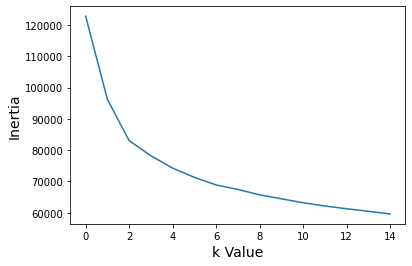

--------------------------------------------------------------------------------


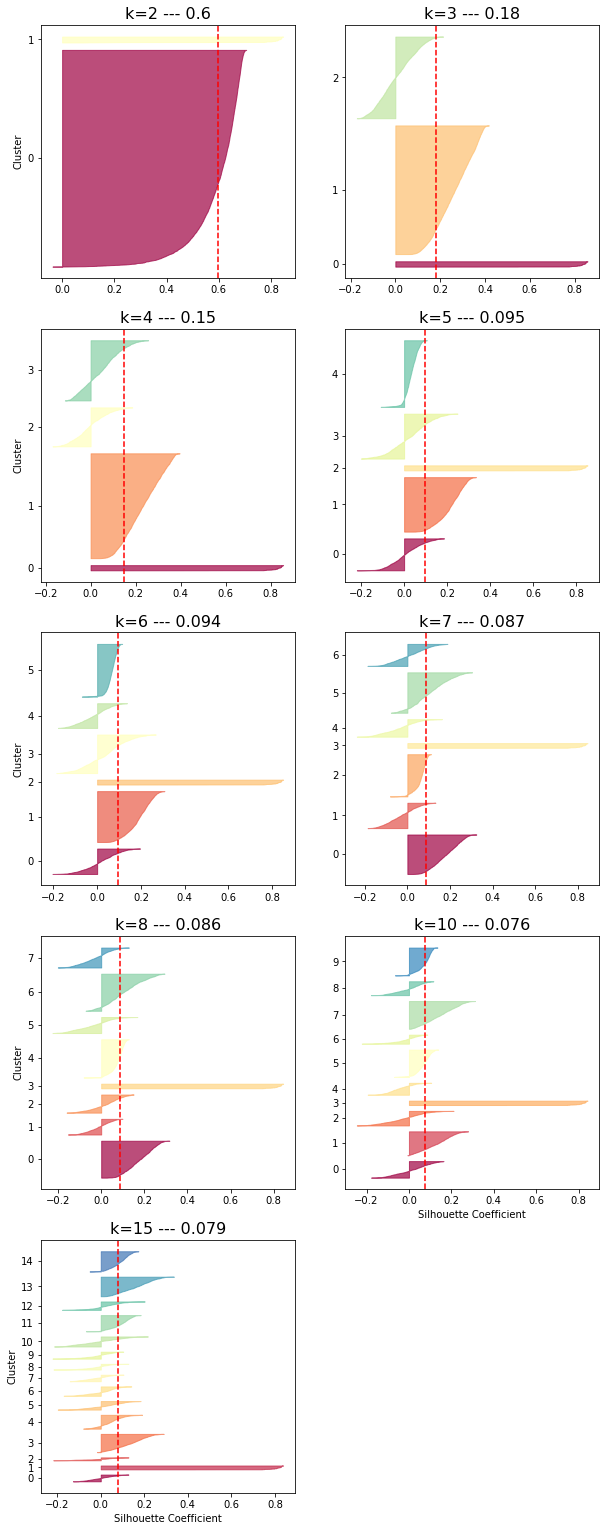

In [63]:
#use this function to evaluate your X data across different k values
#NOTE: this function can take a little time especially if your k value list has numbers > 20
inertia_silhouette_plot(X, [2,3,4,5,6,7,8,10, 15])

In [64]:
k = 3

#create the model
kmeans = KMeans(n_clusters=k, random_state=42)

#fit the model and predict y values (i.e. cluster value)
y_pred = kmeans.fit_predict(X)

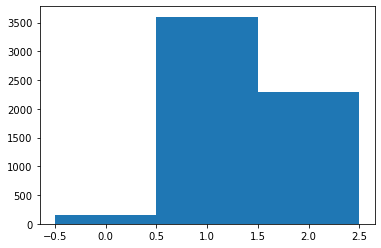

In [65]:
#plot the number of instances in each of the created clusters
plt.hist(y_pred, bins=range(k+1), align='left')
plt.show()

In [66]:
#save the predictions of each instance to a column called KMeans
data30[ "KMeans"] = y_pred

In [67]:
#explore some of the clusters
data30[ data30.KMeans == 2]

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Action,Romance,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans
2.0,3.736842,NaN,4.000,3.000000,3.483871,NaN,NaN,3.898734,3.588235,4.333333,...,3.500000,3.708333,3.583333,3.333333,3.733333,3.560000,25.0,15.0,2,2
4.0,3.833333,NaN,NaN,4.333333,3.500000,4.000000,NaN,4.166667,3.555556,4.500000,...,4.157895,4.000000,5.000000,NaN,3.333333,NaN,25.0,20.0,2,2
5.0,3.000000,4.000000,4.000,2.800000,2.846154,3.833333,3.666667,3.096154,3.066667,4.000000,...,2.612903,3.100000,3.285714,3.125000,3.500000,3.410714,50.0,9.0,1,2
6.0,3.750000,4.222222,NaN,NaN,3.666667,3.875000,NaN,3.727273,3.500000,3.625000,...,4.000000,4.000000,3.000000,NaN,4.000000,3.750000,35.0,1.0,2,2
7.0,4.625000,NaN,NaN,5.000000,4.600000,NaN,NaN,4.000000,4.300000,NaN,...,4.310345,4.000000,4.000000,4.000000,4.750000,4.333333,25.0,12.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6028.0,3.083333,4.000000,NaN,3.333333,3.684211,1.000000,NaN,3.692308,3.600000,NaN,...,3.452381,3.833333,3.375000,NaN,3.500000,NaN,25.0,1.0,1,2
6029.0,3.000000,3.500000,NaN,4.500000,4.166667,3.500000,NaN,3.866667,3.000000,NaN,...,2.800000,3.750000,3.333333,NaN,3.666667,3.545455,25.0,17.0,2,2
6034.0,3.000000,3.000000,4.375,4.000000,4.125000,NaN,NaN,4.000000,5.000000,3.000000,...,NaN,NaN,4.500000,4.600000,4.000000,2.500000,25.0,1.0,1,2
6035.0,3.000000,3.250000,3.000,2.333333,1.972973,2.035714,NaN,3.116071,2.762500,2.333333,...,2.634921,3.047619,3.150000,3.300000,3.307692,2.246154,25.0,15.0,1,2


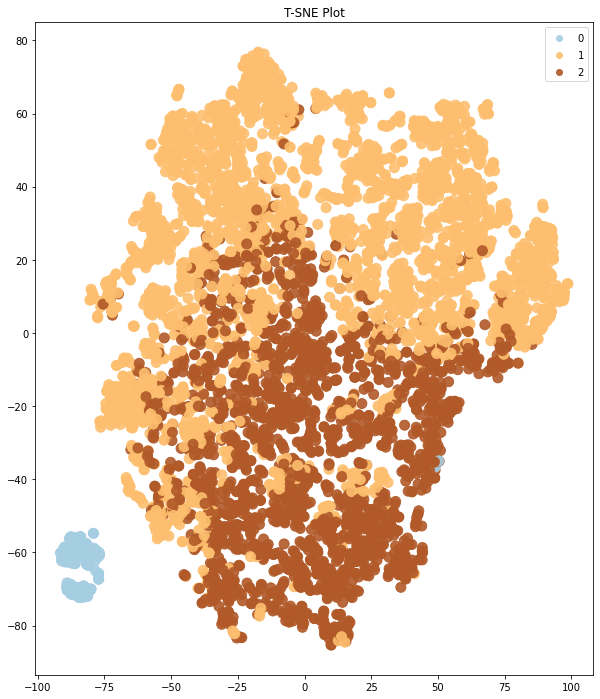

In [68]:
#plot DBSCAN results on a 2-dimensional tSNE of the same data set
tsne_plot(X, y_pred)

In [69]:
pd.set_option("display.max_colwidth",3000)
data30[ data30.KMeans == 2].describe()

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Action,Romance,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans
count,2287.000000,1462.000000,1092.000000,1804.000000,2247.000000,1716.000000,511.000000,2285.000000,2207.000000,1129.000000,...,2272.000000,2223.000000,2002.000000,1675.000000,2085.000000,2278.000000,2287.000000,2287.000000,2287.000000,2287.0
mean,3.270760,3.268523,3.681997,2.900180,3.431826,3.067065,3.496234,3.626912,3.190837,3.107989,...,3.316575,3.440710,3.474561,3.425865,3.691013,3.371821,30.590730,8.107564,1.710538,2.0
std,0.716369,0.887598,0.898748,0.863947,0.636116,0.883632,1.110622,0.504414,0.686876,1.005472,...,0.628722,0.644975,0.775916,0.846000,0.756323,0.555086,13.120762,6.363292,0.453612,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.0
25%,2.877486,2.893897,3.000000,2.382212,3.000000,2.500000,3.000000,3.314607,2.800000,2.500000,...,2.947541,3.000000,3.000000,3.000000,3.240000,3.000000,25.000000,2.000000,1.000000,2.0
50%,3.250000,3.274295,4.000000,3.000000,3.440000,3.000000,3.750000,3.642857,3.166667,3.000000,...,3.333333,3.444444,3.500000,3.454545,3.750000,3.378844,25.000000,7.000000,2.000000,2.0
75%,3.750000,4.000000,4.135714,3.500000,3.857143,3.666667,4.023810,4.000000,3.638695,4.000000,...,3.731410,3.888889,4.000000,4.000000,4.166667,3.750000,35.000000,14.000000,2.000000,2.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000,20.000000,2.000000,2.0


In [70]:
# Fan of Film-Noir, doc, drama, crime,mystery, war, (occupation 8.24?), avg 30year old, typically a man (1.736), lowest ratings was for horror (3.33)

## DBSCAN

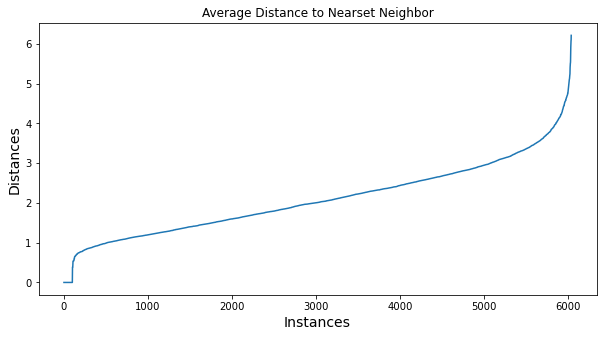

In [71]:
#But how to determine a good epsilon?
#one method is to review the Avg. Distances to Nearest Neighbor graph and find its "elbow point"
nn_avg_distance(X)

In [72]:
#And then once you know the range for your epsilon, use a loop to try out a few values
for e in range(150,221,5):
    epsilon = e  / 100
    dbscan = DBSCAN(eps=epsilon, min_samples=10)      #epsilon defines the neighborhood distance
    dbscan.fit(X)
    print(epsilon, "-", set(list(dbscan.labels_)))

1.5 - {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, -1}
1.55 - {0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
1.6 - {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1}
1.65 - {0, 1, 2, 3, 4, 5, -1}
1.7 - {0, 1, 2, 3, 4, -1}
1.75 - {0, 1, -1}
1.8 - {0, 1, -1}
1.85 - {0, 1, 2, -1}
1.9 - {0, 1, -1}
1.95 - {0, 1, 2, -1}
2.0 - {0, 1, 2, -1}
2.05 - {0, 1, 2, 3, -1}
2.1 - {0, 1, -1}
2.15 - {0, 1, -1}
2.2 - {0, 1, -1}


In [73]:
#create and fit the model
for epsilon in np.linspace(1.75,2.20,num=15):
    dbscan = DBSCAN(eps=epsilon, min_samples=10)   #epsilon defines the neighborhood distance
    dbscan.fit(X)
    print(epsilon, "-", set(list(dbscan.labels_)))

1.75 - {0, 1, -1}
1.7821428571428573 - {0, 1, -1}
1.8142857142857143 - {0, 1, -1}
1.8464285714285715 - {0, 1, 2, -1}
1.8785714285714286 - {0, 1, -1}
1.9107142857142858 - {0, 1, -1}
1.9428571428571428 - {0, 1, 2, -1}
1.975 - {0, 1, -1}
2.007142857142857 - {0, 1, 2, 3, -1}
2.0392857142857146 - {0, 1, 2, -1}
2.0714285714285716 - {0, 1, 2, -1}
2.1035714285714286 - {0, 1, -1}
2.1357142857142857 - {0, 1, -1}
2.167857142857143 - {0, 1, -1}
2.2 - {0, 1, -1}


In [74]:
# best = 2.2 - {0, 1, 2, -1}

In [75]:
dbscan = DBSCAN(eps=epsilon, min_samples=10)      #epsilon defines the neighborhood distance
dbscan.fit(X)
print(epsilon, "-", set(list(dbscan.labels_)))

2.2 - {0, 1, -1}


In [76]:
#was able to create 3 clusters with a DBSCAN

In [77]:
y_pred=dbscan.labels_
set(list(y_pred))

{-1, 0, 1}

In [78]:
#save the predictions of each instance to a column called DBSCAN
data30[ 'DBSCAN' ] = y_pred

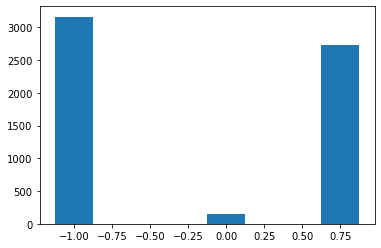

In [79]:
#plot the number of instances in each of the created clusters
plt.hist(y_pred, bins=8,align='left')
plt.show()

In [80]:
data30 [ data30.DBSCAN == 0]

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Romance,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans,DBSCAN
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,10.0,1,0,0
14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.0,7.0,2,0,0
51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0,4.0,2,0,0
56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0,19.0,2,0,0
74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,10.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.0,0.0,1,0,0
5768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.0,14.0,2,0,0
5895.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.0,0.0,2,0,0
5897.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0,0.0,1,0,0


In [81]:
data30 [ data30.DBSCAN == 1]

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Romance,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans,DBSCAN
10.0,4.114286,4.303030,3.500000,4.000000,4.222222,4.109375,4.000000,4.181034,4.183099,3.875000,...,4.373134,3.600000,3.625000,3.833333,4.136612,25.0,1.0,1,1,1
13.0,3.333333,3.000000,3.000000,3.333333,3.450000,3.333333,NaN,3.863636,3.540541,2.666667,...,3.307692,3.250000,3.000000,4.222222,3.000000,35.0,0.0,2,1,1
15.0,3.173913,4.000000,2.500000,2.900000,3.460317,3.000000,NaN,3.481013,3.277778,3.666667,...,3.120000,3.218750,3.315789,3.769231,3.000000,35.0,0.0,1,1,1
17.0,4.085714,4.500000,4.333333,3.750000,4.000000,4.272727,5.000000,4.144928,4.008621,4.000000,...,4.133333,4.136364,4.444444,4.500000,4.333333,18.0,3.0,1,1,1
18.0,3.358025,4.380952,4.333333,2.857143,3.047619,3.858974,NaN,3.961165,3.454545,3.555556,...,3.931818,3.454545,4.000000,4.000000,3.525000,1.0,10.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035.0,3.000000,3.250000,3.000000,2.333333,1.972973,2.035714,NaN,3.116071,2.762500,2.333333,...,3.047619,3.150000,3.300000,3.307692,2.246154,25.0,15.0,1,2,1
6036.0,2.987952,3.911765,4.058824,2.986486,3.142857,3.444444,3.909091,3.505376,2.834320,3.642857,...,3.352459,3.528302,3.411765,3.785714,3.203065,45.0,1.0,1,1,1
6037.0,4.000000,4.000000,3.444444,4.111111,3.705882,3.666667,4.000000,3.877551,3.692308,3.750000,...,3.681818,3.833333,3.692308,4.000000,3.576271,56.0,1.0,1,1,1
6039.0,4.100000,3.615385,4.500000,4.000000,4.142857,3.529412,NaN,4.000000,4.250000,4.500000,...,3.800000,4.000000,4.176471,4.111111,3.723077,25.0,6.0,2,1,1


In [82]:
data30 [ data30.DBSCAN == 2]

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Romance,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans,DBSCAN


In [83]:
data30[ y_pred == 0]

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Romance,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans,DBSCAN
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,10.0,1,0,0
14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.0,7.0,2,0,0
51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0,4.0,2,0,0
56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0,19.0,2,0,0
74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,10.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.0,0.0,1,0,0
5768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.0,14.0,2,0,0
5895.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.0,0.0,2,0,0
5897.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0,0.0,1,0,0


## Bayesian Guassian Mixture

In [84]:
# create a model and fit X

#set the k value to your best guess (or higher)
#n_init defines how many times to fit the model
bgm = BayesianGaussianMixture(n_components=4, n_init=15)  
bgm.fit(X)

BayesianGaussianMixture(n_components=4, n_init=15)

In [85]:
#let's look at the weights to possible clusters and zero to all unneeded clusters
weights = np.round(bgm.weights_,2)
weights

array([0.52, 0.02, 0.08, 0.38])

In [86]:
#calculate the ideal k value (or just count the values above)
k = len(set(list(weights)))
k

4

## Gaussian Mixture

In [87]:
#Let's train a Gaussian Mixture on this dataset. 
k = 3
#it might have to be 3 or 4

gauss = GaussianMixture(n_components=k, random_state=42)
y_pred = gauss.fit_predict(X)

In [88]:
#save the predictions of each instance to a column called Gauss
data30['Gauss'] = y_pred

In [89]:
#the most likely cluster (hard clustering) predictions made
y_pred

array([0, 1, 1, ..., 2, 1, 1], dtype=int64)

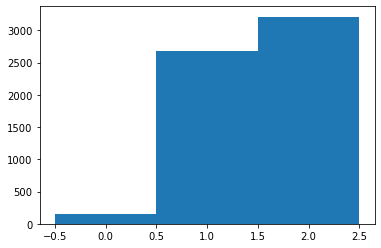

In [90]:
#plot the number of instances in each of the created clusters
plt.hist(y_pred, bins=range(k+1), align='left')
plt.show()

In [91]:
data30[ data30.Gauss == 0]

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans,DBSCAN,Gauss
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,10.0,1,0,0,0
14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.0,7.0,2,0,0,0
51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.0,4.0,2,0,0,0
56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.0,19.0,2,0,0,0
74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,10.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.0,0.0,1,0,0,0
5768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,45.0,14.0,2,0,0,0
5895.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.0,0.0,2,0,0,0
5897.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.0,0.0,1,0,0,0


In [92]:
data30[ data30.Gauss == 1]

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans,DBSCAN,Gauss
1.0,4.000000,4.111111,NaN,NaN,3.666667,4.250000,NaN,4.428571,4.333333,NaN,...,4.000000,NaN,5.000000,4.142857,56.0,16.0,2,1,-1,1
2.0,3.736842,NaN,4.00,3.000000,3.483871,NaN,NaN,3.898734,3.588235,4.333333,...,3.583333,3.333333,3.733333,3.560000,25.0,15.0,2,2,-1,1
4.0,3.833333,NaN,NaN,4.333333,3.500000,4.000000,NaN,4.166667,3.555556,4.500000,...,5.000000,NaN,3.333333,NaN,25.0,20.0,2,2,-1,1
7.0,4.625000,NaN,NaN,5.000000,4.600000,NaN,NaN,4.000000,4.300000,NaN,...,4.000000,4.000000,4.750000,4.333333,25.0,12.0,2,2,-1,1
8.0,3.888889,4.250000,NaN,5.000000,4.034483,3.000000,NaN,3.814815,4.461538,4.000000,...,4.000000,3.500000,4.200000,3.888889,25.0,17.0,2,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032.0,3.875000,4.300000,4.75,3.562500,4.714286,4.153846,5.0,4.051282,4.428571,3.500000,...,4.000000,4.800000,4.555556,4.475000,50.0,13.0,2,1,1,1
6033.0,3.842105,3.000000,3.00,3.666667,4.000000,4.000000,NaN,3.947368,3.823529,3.400000,...,3.285714,NaN,3.727273,4.000000,25.0,14.0,2,1,-1,1
6035.0,3.000000,3.250000,3.00,2.333333,1.972973,2.035714,NaN,3.116071,2.762500,2.333333,...,3.150000,3.300000,3.307692,2.246154,25.0,15.0,1,2,1,1
6039.0,4.100000,3.615385,4.50,4.000000,4.142857,3.529412,NaN,4.000000,4.250000,4.500000,...,4.000000,4.176471,4.111111,3.723077,25.0,6.0,2,1,1,1


In [93]:
data30[ data30.Gauss == 2]

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans,DBSCAN,Gauss
3.0,4.000000,4.000000,NaN,2.666667,3.800000,4.000000,NaN,4.000000,3.833333,4.666667,...,NaN,3.000000,4.000000,3.766667,45.0,7.0,2,1,-1,2
5.0,3.000000,4.000000,4.000000,2.800000,2.846154,3.833333,3.666667,3.096154,3.066667,4.000000,...,3.285714,3.125000,3.500000,3.410714,50.0,9.0,1,2,-1,2
6.0,3.750000,4.222222,NaN,NaN,3.666667,3.875000,NaN,3.727273,3.500000,3.625000,...,3.000000,NaN,4.000000,3.750000,35.0,1.0,2,2,-1,2
9.0,3.428571,4.111111,4.000000,2.000000,3.629630,4.200000,3.500000,3.888889,3.888889,5.000000,...,3.750000,4.000000,4.142857,3.740741,35.0,1.0,1,1,-1,2
10.0,4.114286,4.303030,3.500000,4.000000,4.222222,4.109375,4.000000,4.181034,4.183099,3.875000,...,3.600000,3.625000,3.833333,4.136612,25.0,1.0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6031.0,4.714286,4.000000,3.000000,4.000000,4.000000,4.428571,NaN,3.368421,4.555556,1.000000,...,3.000000,5.000000,2.000000,3.222222,45.0,7.0,2,1,-1,2
6034.0,3.000000,3.000000,4.375000,4.000000,4.125000,NaN,NaN,4.000000,5.000000,3.000000,...,4.500000,4.600000,4.000000,2.500000,25.0,1.0,1,2,-1,2
6036.0,2.987952,3.911765,4.058824,2.986486,3.142857,3.444444,3.909091,3.505376,2.834320,3.642857,...,3.528302,3.411765,3.785714,3.203065,45.0,1.0,1,1,1,2
6037.0,4.000000,4.000000,3.444444,4.111111,3.705882,3.666667,4.000000,3.877551,3.692308,3.750000,...,3.833333,3.692308,4.000000,3.576271,56.0,1.0,1,1,1,2


In [94]:
#data30[ y_pred == 0 ]
data30[ data30.Gauss == 0].describe()

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans,DBSCAN,Gauss
count,2.0,2.000000,1.0,0.0,2.000000,2.000000,2.0,2.000000,1.0,1.0,...,2.000000,2.0,2.0,2.000000,149.000000,149.000000,149.000000,149.0,149.000000,149.0
mean,1.0,1.250000,1.0,NaN,1.126984,1.166667,1.0,1.532292,1.0,1.0,...,1.500000,1.0,1.0,1.531250,28.651007,8.476510,1.677852,0.0,-0.013423,0.0
std,0.0,0.353553,NaN,NaN,0.022448,0.235702,0.0,0.705634,NaN,NaN,...,0.707107,0.0,0.0,0.751301,12.586955,6.457328,0.468875,0.0,0.115465,0.0
min,1.0,1.000000,1.0,NaN,1.111111,1.000000,1.0,1.033333,1.0,1.0,...,1.000000,1.0,1.0,1.000000,1.000000,0.000000,1.000000,0.0,-1.000000,0.0
25%,1.0,1.125000,1.0,NaN,1.119048,1.083333,1.0,1.282813,1.0,1.0,...,1.250000,1.0,1.0,1.265625,18.000000,4.000000,1.000000,0.0,0.000000,0.0
50%,1.0,1.250000,1.0,NaN,1.126984,1.166667,1.0,1.532292,1.0,1.0,...,1.500000,1.0,1.0,1.531250,25.000000,7.000000,2.000000,0.0,0.000000,0.0
75%,1.0,1.375000,1.0,NaN,1.134921,1.250000,1.0,1.781771,1.0,1.0,...,1.750000,1.0,1.0,1.796875,35.000000,14.000000,2.000000,0.0,0.000000,0.0
max,1.0,1.500000,1.0,NaN,1.142857,1.333333,1.0,2.031250,1.0,1.0,...,2.000000,1.0,1.0,2.062500,56.000000,20.000000,2.000000,0.0,0.000000,0.0


In [95]:
#film-noir, doc,drama, crime, war, (mystery basically yes), occupation 8.4, age 29.39, mostly male (1.748)

## Analyze Cluster Assignments

In [96]:
data30.head(20)

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans,DBSCAN,Gauss
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,10.0,1,0,0,0
1.0,4.000000,4.111111,NaN,NaN,3.666667,4.250000,NaN,4.428571,4.333333,NaN,...,4.000000,NaN,5.000000,4.142857,56.0,16.0,2,1,-1,1
2.0,3.736842,NaN,4.000000,3.000000,3.483871,NaN,NaN,3.898734,3.588235,4.333333,...,3.583333,3.333333,3.733333,3.560000,25.0,15.0,2,2,-1,1
3.0,4.000000,4.000000,NaN,2.666667,3.800000,4.000000,NaN,4.000000,3.833333,4.666667,...,NaN,3.000000,4.000000,3.766667,45.0,7.0,2,1,-1,2
4.0,3.833333,NaN,NaN,4.333333,3.500000,4.000000,NaN,4.166667,3.555556,4.500000,...,5.000000,NaN,3.333333,NaN,25.0,20.0,2,2,-1,1
5.0,3.000000,4.000000,4.000000,2.800000,2.846154,3.833333,3.666667,3.096154,3.066667,4.000000,...,3.285714,3.125000,3.500000,3.410714,50.0,9.0,1,2,-1,2
6.0,3.750000,4.222222,NaN,NaN,3.666667,3.875000,NaN,3.727273,3.500000,3.625000,...,3.000000,NaN,4.000000,3.750000,35.0,1.0,2,2,-1,2
7.0,4.625000,NaN,NaN,5.000000,4.600000,NaN,NaN,4.000000,4.300000,NaN,...,4.000000,4.000000,4.750000,4.333333,25.0,12.0,2,2,-1,1
8.0,3.888889,4.250000,NaN,5.000000,4.034483,3.000000,NaN,3.814815,4.461538,4.000000,...,4.000000,3.500000,4.200000,3.888889,25.0,17.0,2,1,-1,1
9.0,3.428571,4.111111,4.000000,2.000000,3.629630,4.200000,3.500000,3.888889,3.888889,5.000000,...,3.750000,4.000000,4.142857,3.740741,35.0,1.0,1,1,-1,2


In [97]:
#remove any ticker that was assigned a -1 during DBSCAN
pairedTickers = data30[data30.DBSCAN != -1 ]

#group the data by their Gauss, KMeans and DBSCAN values and then take a count
pairedTickers = pairedTickers.groupby(by=['KMeans','Gauss']).count()
#add Gauss

#keep only those combinations that had more than 1 Stock Ticker

#pairedTickers = pairedTickers[pairedTickers.>1]

#display the paired combinations
pairedTickers.Horror.head(10)

KMeans  Gauss
0       0           0
1       1        1069
        2        1222
2       1         185
        2         251
Name: Horror, dtype: int64

In [98]:
#explore a particular "cluster"
data30[  (data30.KMeans==2) & (data30.Gauss == 0) ]   # (data.Gauss== 1) &

#df1 = data.describe()
#df2 = data [ data.DBSCAN == 1].describe()
#df1.compare(df2)

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans,DBSCAN,Gauss


In [99]:
data30[(data30.KMeans==2) & (data30.Gauss == 0)].describe()

,Adventure,Animation,Film-Noir,Horror,Thiller,Children's,Documentary,Drama,Sci-Fi,Western,...,Crime,Mystery,War,Comedy,age,occupation,Sex,KMeans,DBSCAN,Gauss
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
